<a href="https://colab.research.google.com/github/Junaiis/29766junais/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [12]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [13]:
df.shape


(15936, 31)

In [14]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [15]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,...,15936.000000,15936.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000
mean,12121.217871,-0.254293,0.277171,0.803852,0.301343,-0.130469,0.112551,-0.150434,0.000687,0.860838,...,-0.061754,-0.162257,-0.036524,0.011509,0.117477,0.037900,0.015402,0.006161,66.390222,0.004581
std,8982.283843,1.843083,1.491497,1.704252,1.491713,1.382485,1.329406,1.321898,1.303509,1.253988,...,0.855525,0.624614,0.543296,0.587200,0.436867,0.546881,0.401168,0.253739,189.355098,0.067531
min,0.000000,-28.344757,-40.978852,-27.368650,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.512377,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3633.500000,-0.970824,-0.286548,0.371671,-0.621215,-0.712525,-0.639011,-0.600811,-0.179179,0.067089,...,-0.268829,-0.559341,-0.173003,-0.336475,-0.140144,-0.355523,-0.073563,-0.013205,5.490000,0.000000
50%,10980.000000,-0.318478,0.247437,0.941822,0.231366,-0.186241,-0.160812,-0.084696,0.017471,0.851878,...,-0.127164,-0.126343,-0.044512,0.060331,0.155636,-0.027574,0.001209,0.017630,15.950000,0.000000
75%,20621.500000,1.161949,0.884689,1.575960,1.180124,0.352221,0.501828,0.440006,0.266216,1.567643,...,0.027233,0.229727,0.072765,0.393416,0.393032,0.359173,0.100782,0.076575,53.890000,0.000000
max,27371.000000,1.960497,14.601998,4.101716,11.927512,34.099309,21.393069,34.303177,17.052566,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


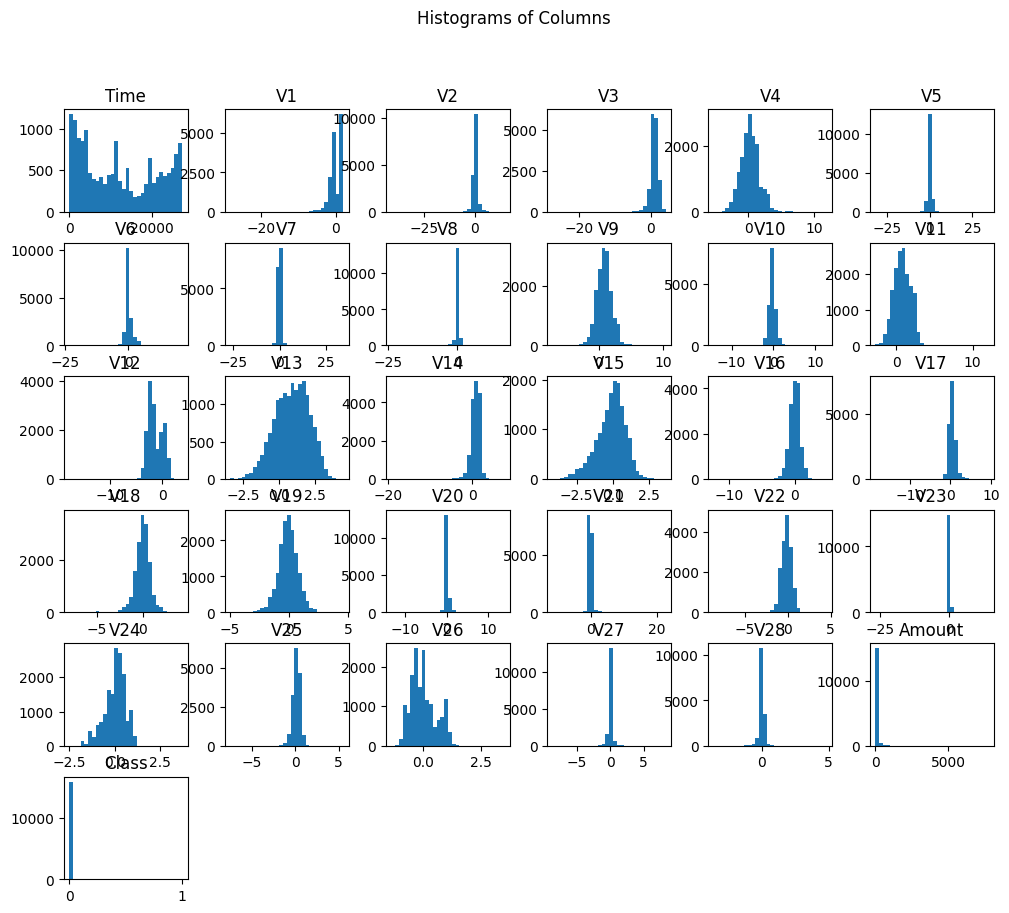

In [17]:
df.hist(bins=30,figsize=(12,10), grid=False )
plt.suptitle('Histograms of Columns')
plt.show()

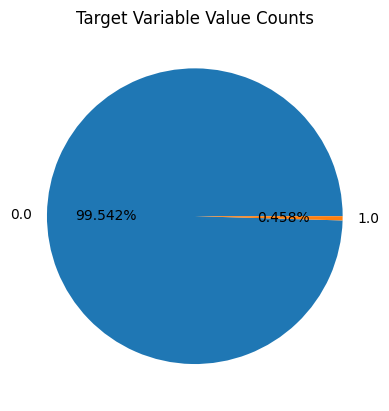

Class
0.0    15862
1.0       73
Name: count, dtype: int64


In [20]:

labels = df.Class.value_counts().index
sizes = df.Class.value_counts().values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()
print(df.Class.value_counts())

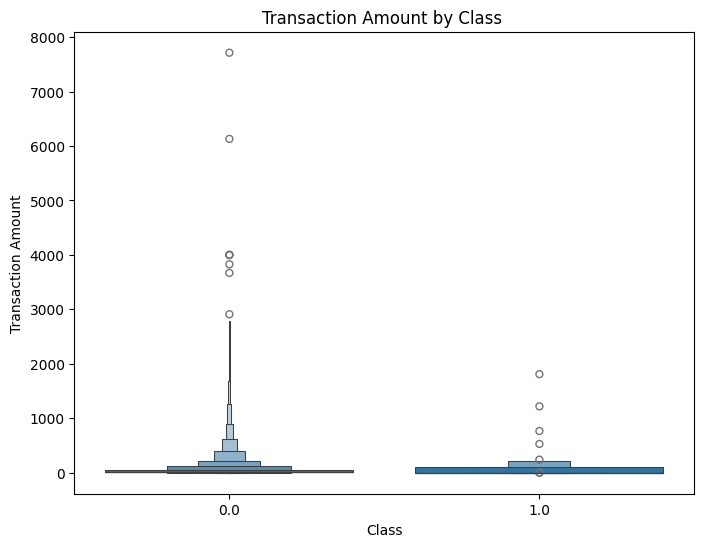

In [22]:
plt.figure(figsize=(8, 6))
sns.boxenplot(data=df, x='Class', y='Amount')
plt.title('Transaction Amount by Class ')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

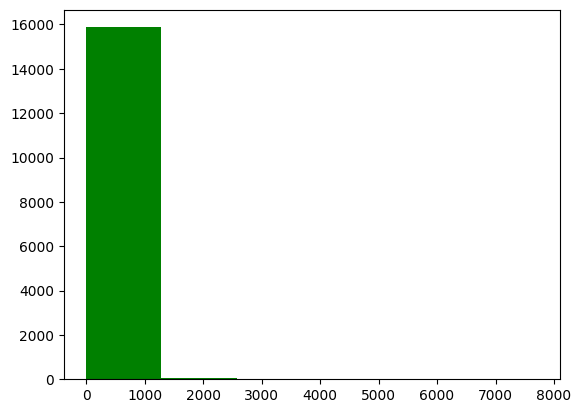

Minimum amount value is  nan
Maximum amount value is  nan
90% of the transactions have an amount less or equal than  nan


In [23]:
plt.hist(df.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(df.Amount.values))
print("Maximum amount value is ", np.max(df.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(df.Amount.values, 90))


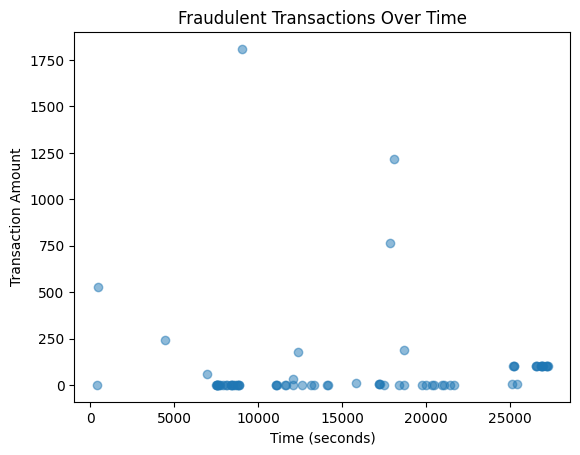

In [24]:
fraud = df[df['Class'] == 1]
plt.scatter(fraud['Time'], fraud['Amount'], alpha=0.5)
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

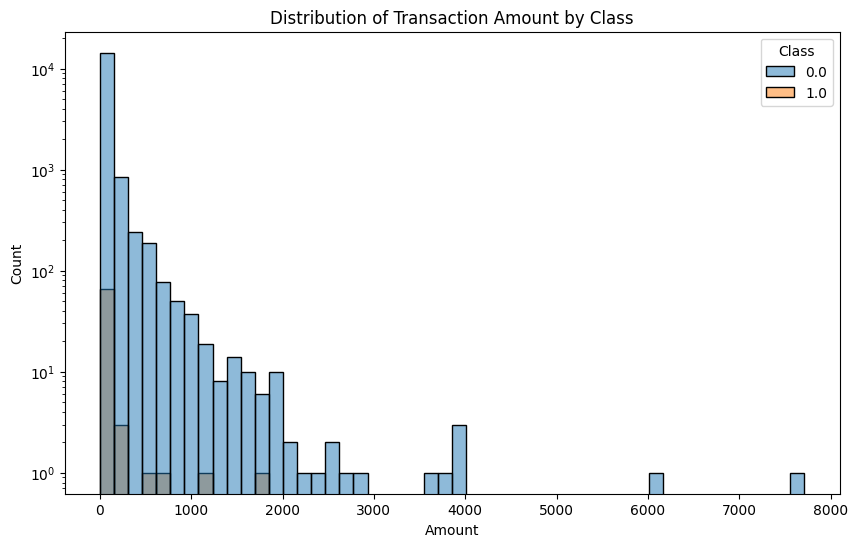

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount', hue='Class', bins=50)
plt.title('Distribution of Transaction Amount by Class')
plt.yscale('log')
plt.show()

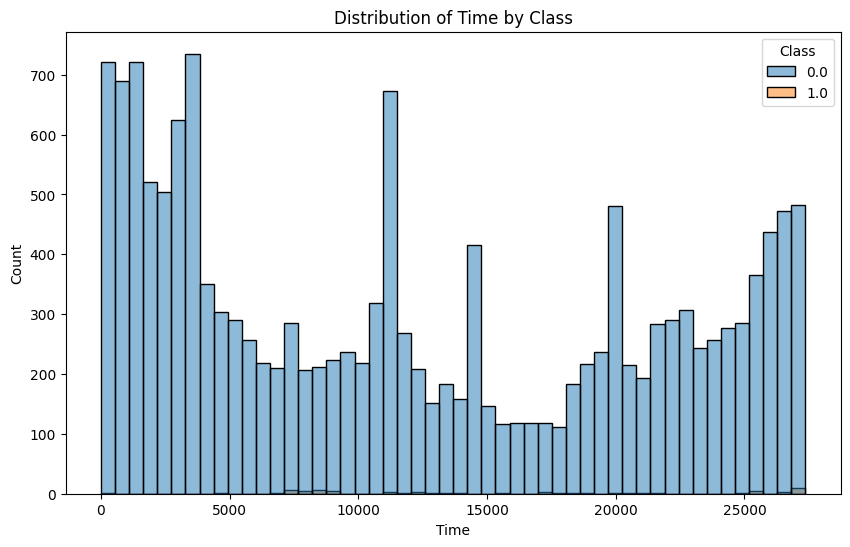

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Time', hue='Class', bins=50)
plt.title('Distribution of Time by Class')
plt.show()

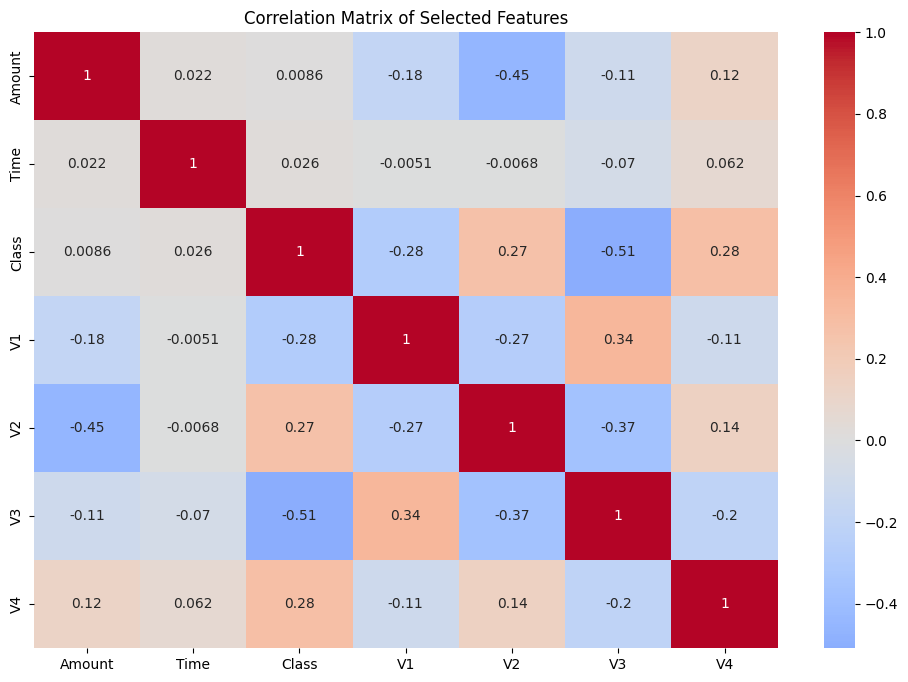

In [27]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[['Amount', 'Time', 'Class'] + [f'V{i}' for i in range(1, 5)]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

In [33]:
# Before splitting into train and test sets
df = df.dropna(subset=['Class'])  # Assuming 'Class' is your target column

# Now proceed with data splitting and model training

In [34]:
# standardize features
from sklearn.preprocessing import StandardScaler
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])
data_matrix = df.values

# Separate features and target
X = data_matrix[:, 1:30]
y = data_matrix[:, 30]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Original training set shape:", dict(zip(*np.unique(y_train, return_counts=True))))
print('\n')
print('X.shape=', X.shape, 'y.shape=', y.shape)

Original training set shape: {0.0: 12695, 1.0: 53}


X.shape= (15935, 29) y.shape= (15935,)


In [35]:
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (12748, 29) Y_train.shape= (12748,)
X_test.shape= (3187, 29) Y_test.shape= (3187,)


In [36]:
# DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the accuracy
accuracy = dt_model.score(X_test, y_test)
print("DecisionTreeClassifier Accuracy: {0:.5f}".format(accuracy))

DecisionTreeClassifier Accuracy: 0.99780


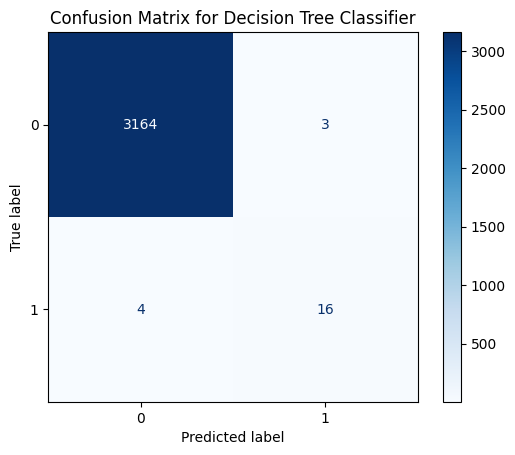

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [38]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the accuracy
accuracy_rf = rf_model.score(X_test, y_test)
print("RandomForestClassifier Accuracy: {0:.5f}".format(accuracy_rf))

RandomForestClassifier Accuracy: 0.99906


In [39]:
svm_model = SVC(C=1.0, random_state=42)  # dual=False für große Datensätze empfohlen
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = svm_model.score(X_test, y_test)

print("SVC Accuracy: {0:.5f}".format(accuracy_svm))

SVC Accuracy: 0.99843


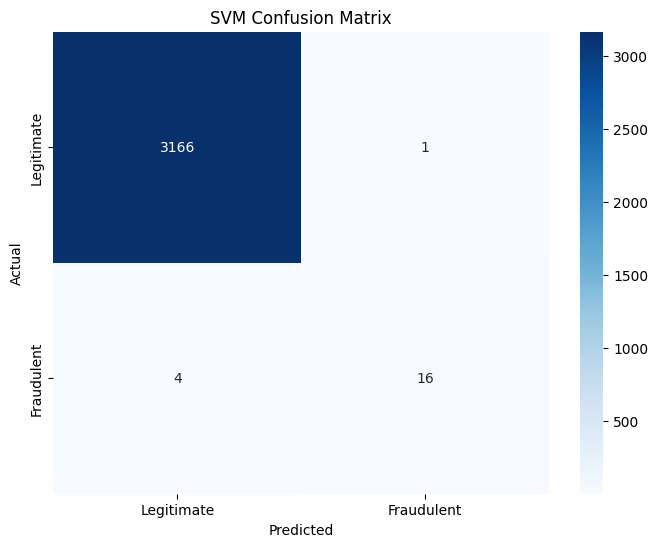

In [40]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

In [41]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the accuracy
accuracy_logreg = logreg_model.score(X_test, y_test)
print("LogisticRegression Accuracy: {0:.5f}".format(accuracy_logreg))

LogisticRegression Accuracy: 0.99843


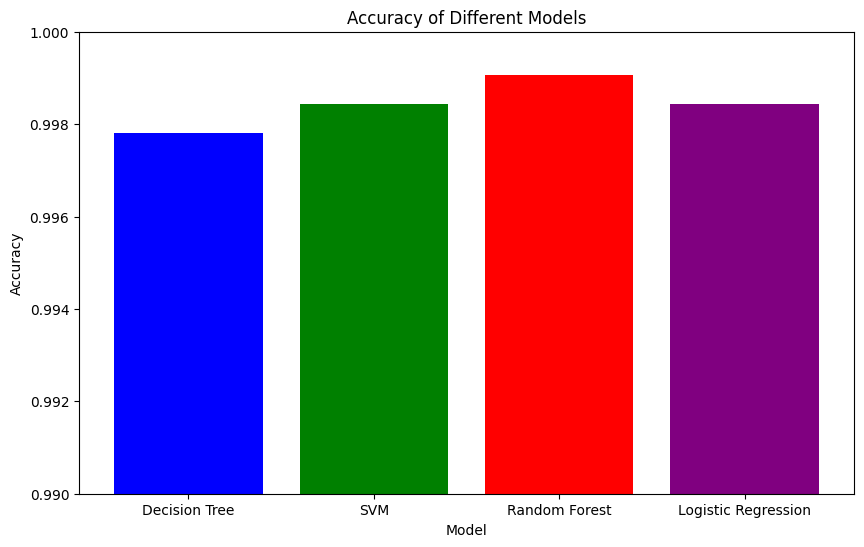

In [42]:
model_names = ['Decision Tree', 'SVM', 'Random Forest', 'Logistic Regression']
accuracies = [accuracy, accuracy_svm, accuracy_rf, accuracy_logreg]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.99, 1.0)  # Adjust the y-axis to better visualize the differences
plt.show()

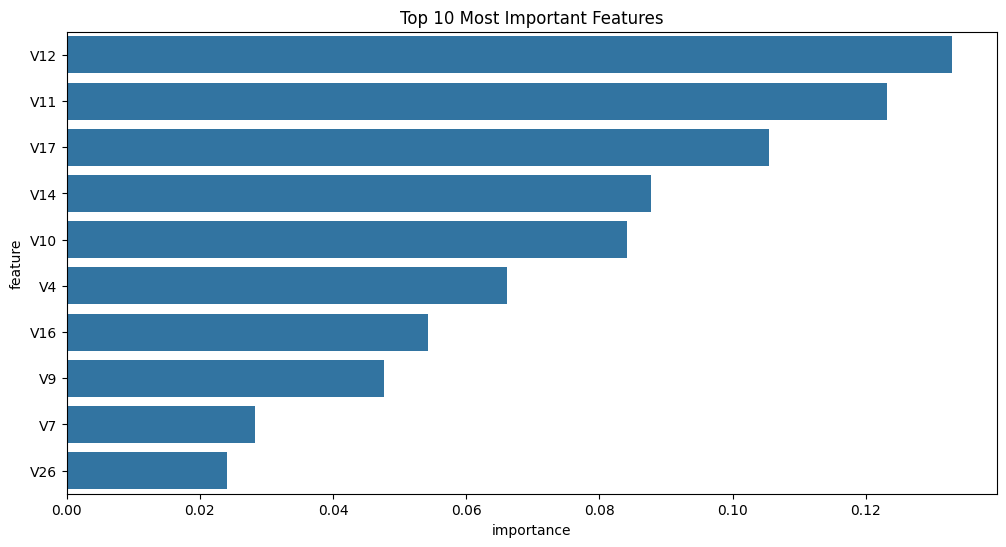

In [45]:
feature_importance = pd.DataFrame({
    'feature': df.columns[1:30],  # Exclude 'Time' and 'Class' columns
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.show()

In [46]:
from sklearn.metrics import classification_report

# Generate classification reports for each model
report_dt = classification_report(y_test, y_pred, target_names=['Legitimate', 'Fraudulent'])
report_svm = classification_report(y_test, y_pred_svm, target_names=['Legitimate', 'Fraudulent'])
report_rf = classification_report(y_test, y_pred_rf, target_names=['Legitimate', 'Fraudulent'])
report_logreg = classification_report(y_test, y_pred_logreg, target_names=['Legitimate', 'Fraudulent'])

# Print the reports
print("Decision Tree Classifier Report:\n", report_dt)
print("SVM Classifier Report:\n", report_svm)
print("Random Forest Classifier Report:\n", report_rf)
print("Logistic Regression Classifier Report:\n", report_logreg)

Decision Tree Classifier Report:
               precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00      3167
  Fraudulent       0.84      0.80      0.82        20

    accuracy                           1.00      3187
   macro avg       0.92      0.90      0.91      3187
weighted avg       1.00      1.00      1.00      3187

SVM Classifier Report:
               precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00      3167
  Fraudulent       0.94      0.80      0.86        20

    accuracy                           1.00      3187
   macro avg       0.97      0.90      0.93      3187
weighted avg       1.00      1.00      1.00      3187

Random Forest Classifier Report:
               precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00      3167
  Fraudulent       0.90      0.95      0.93        20

    accuracy                           1.00      3187
   macro avg       0.95      0.97   